<a href="https://colab.research.google.com/github/judith182/Estadistica-y-probabilidad/blob/main/Regresion_robotica_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
anios<-c(4,2,3,5,2,3,4,5,4,3)
costo<-c(148,128,133,154,118,145,143,159,142,127)

In [ ]:
#install.packages("car")
library(car) #Utilizar este paquete
url <- "http://www.csub.edu/~emontoya2/datasets/textbookdata/Kutner/Chapter%20%201%20Data%20Sets/CH01TA01.txt" #Dato medio de juguete
toluca.data <- read.csv( url , header = FALSE , col.names = c("xvar", "yvar") , sep = "" )
#Datos medio de juguete

#Applied Linear Regressions Models.Fourth Edition. Michael H. Kutner, Christopher J. Nachtsheim & John Neter

In [ ]:
toluca.data

Se disponen datos de 10 restaurantes de Pizzerías Armand ubicados en centors educativos; sea **x** el tamaño de la población estudianti (en miles) y, **y** las ventas trimestrales (en miles de dólares).
Los valores se muestran en la tabla siguiente (slide 43 de la presentación):



1.   Estadísticas de resumen
2.   Exploración gráfica
3.   Modelos en general (sin inferencia)
4.   Conclusiones hasta el momento.



In [ ]:
# Estadísticas de resumen ejemplo de mtto de maquinaria
#summary(anios)
#summary(costo)
mtto<-data.frame(Anios = anios, Costo = costo)
summary(mtto)


     Anios         Costo      
 Min.   :2.0   Min.   :118.0  
 1st Qu.:3.0   1st Qu.:129.2  
 Median :3.5   Median :142.5  
 Mean   :3.5   Mean   :139.7  
 3rd Qu.:4.0   3rd Qu.:147.2  
 Max.   :5.0   Max.   :159.0  

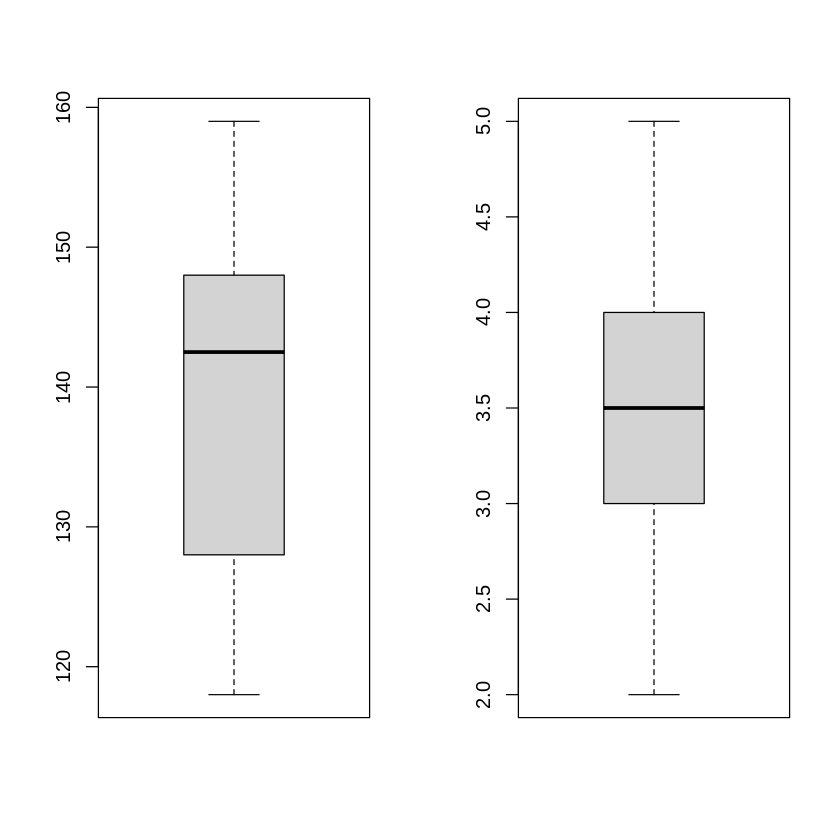

In [ ]:
par(mfrow=c(1,2))
boxplot(costo)
boxplot(anios)

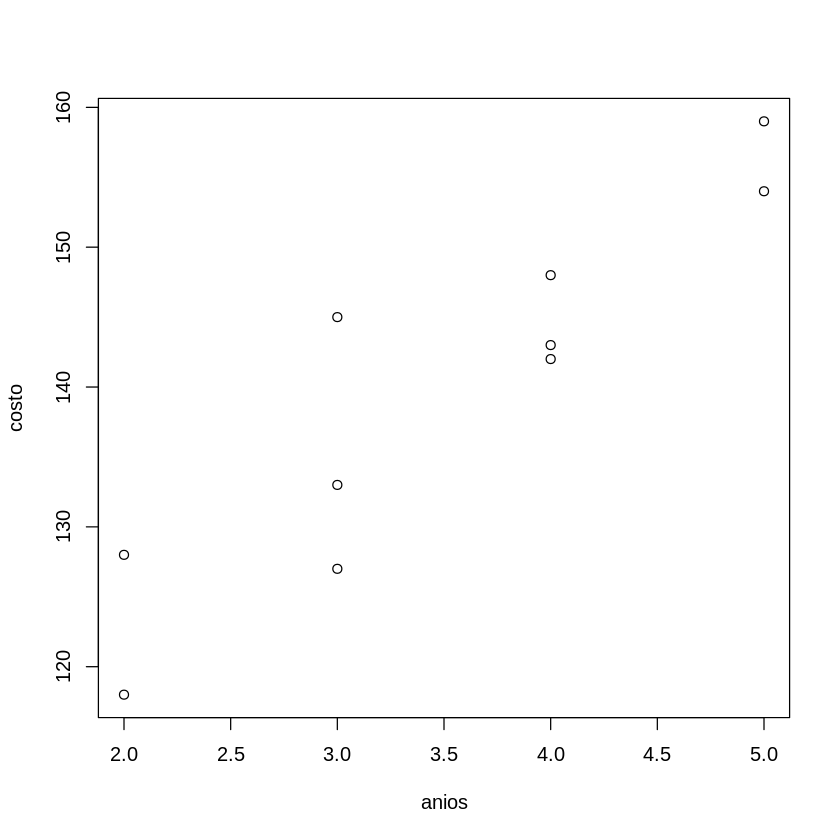

In [ ]:
plot(anios,costo)

In [ ]:
#lm(costo~anios)
 modelo1<-lm(Costo~Anios,data=mtto)

In [ ]:
modelo1$coefficients[2]

Anios 
10.90476

In [ ]:
modelo1$fitted.values

1        2        3        4        5        6        7        8 
145.1524 123.3429 134.2476 156.0571 123.3429 134.2476 145.1524 156.0571 
       9       10 
145.1524 134.2476

$ \hat{y}$ = $\hat{β_{0}}$ + $\hat{β_{1}}x+e $ \
$ \hat{y_i} = 101.5 + 10.9x_i+e_i $

In [ ]:
#Obtener valores predichos (y gorro)
predichos<-modelo1$coefficients[1]+modelo1$coefficients[2]*mtto$Anios
#modelo1$fitted.values
#predichos
#costo-predichos #Residuales
#modelo1$residuals

1        2        3        4        5        6        7        8 
145.1524 123.3429 134.2476 156.0571 123.3429 134.2476 145.1524 156.0571 
       9       10 
145.1524 134.2476

[1] 145.1524 123.3429 134.2476 156.0571 123.3429 134.2476 145.1524 156.0571
 [9] 145.1524 134.2476

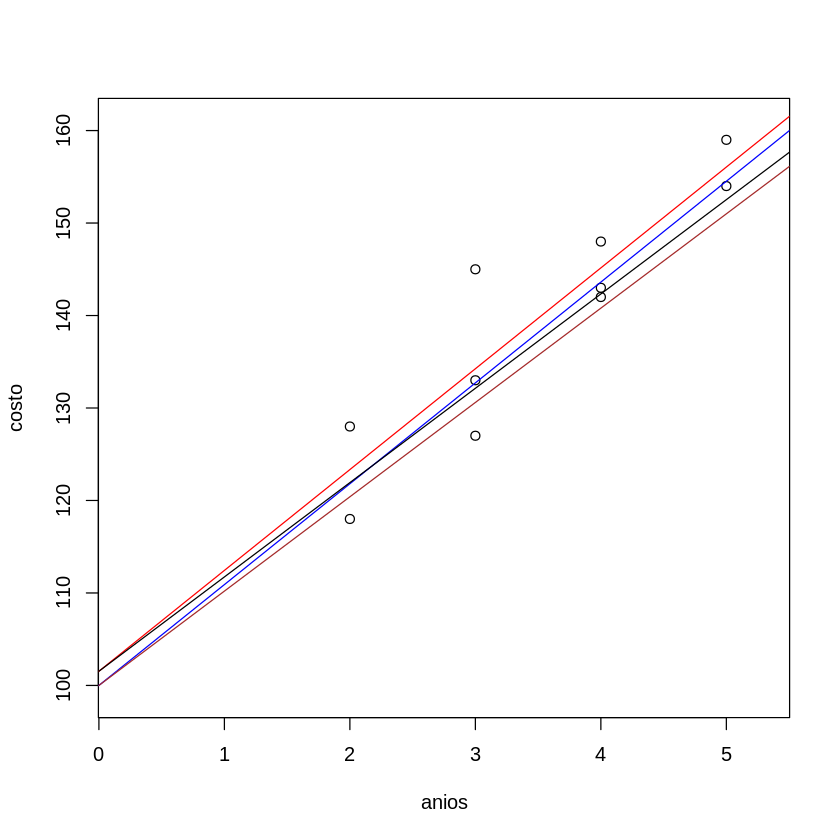

In [ ]:
plot(anios,costo,xlim=c(0.2,5.3),ylim=c(99,161))
#plot(seq(2,5,0.05),predichosfinos,type = "l",col="red",add=TRUE)
abline(a=modelo1$coefficients[1],b=modelo1$coefficients[2],col="red")
abline(a=100,b=modelo1$coefficients[2],col="blue")
abline(a=modelo1$coefficients[1],b=10.2,col="black")
abline(a=100,b=10.2,col="brown")
#predichosfinos<-modelo1$coefficients[1]+modelo1$coefficients[2]*seq(2,5,0.05)



In [ ]:
sum((costo-(100+modelo1$coefficients[2]*mtto$Anios))^2)
sum((costo-(modelo1$coefficients[1]+10.2*mtto$Anios))^2)
sum((costo-(100+10.2*mtto$Anios))^2)

[1] 279.0159

[1] 321.5644

[1] 420.72

In [ ]:
sum((costo-predichos)^2) #De minimos cuadrados

[1] 255.5048

In [ ]:
poblacion<-c(2,6,8,8,12,16,20,20,22,26)
ventas<-c(58,105,88,118,117,137,157,169,149,202)
pizzas<-data.frame(Poblacion = poblacion, Ventas = ventas)

   Poblacion      Ventas     
 Min.   : 2   Min.   : 58.0  
 1st Qu.: 8   1st Qu.:108.0  
 Median :14   Median :127.5  
 Mean   :14   Mean   :130.0  
 3rd Qu.:20   3rd Qu.:155.0  
 Max.   :26   Max.   :202.0  

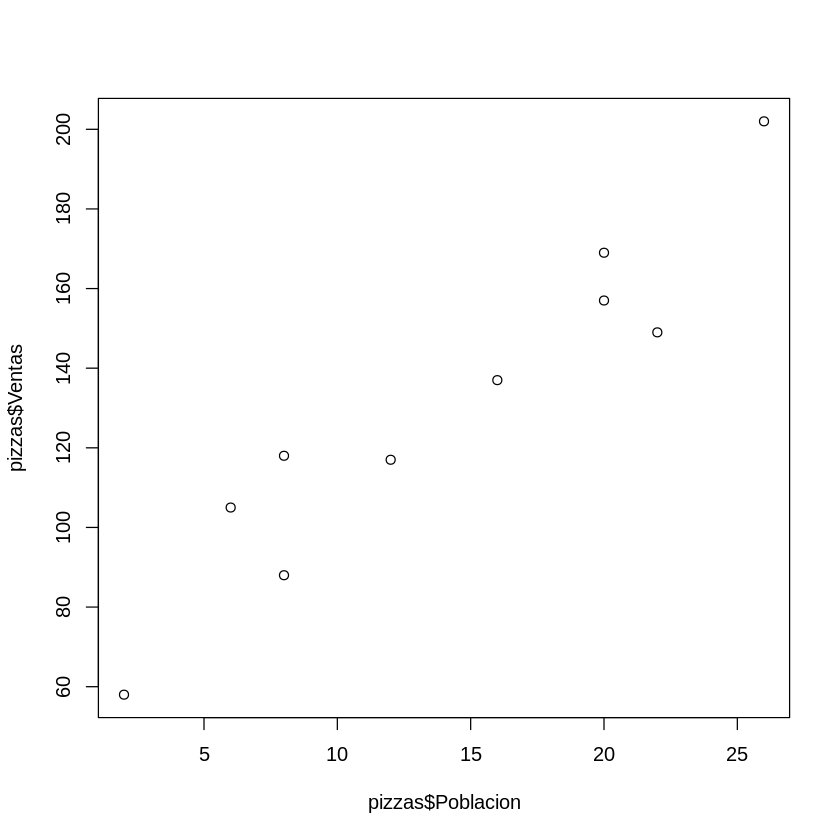

In [ ]:
summary(pizzas)
plot(pizzas$Poblacion,pizzas$Ventas)

In [ ]:
modelo2<-lm(Ventas~Poblacion,data=pizzas)
modelo2


Call:
lm(formula = Ventas ~ Poblacion, data = pizzas)

Coefficients:
(Intercept)    Poblacion  
         60            5  


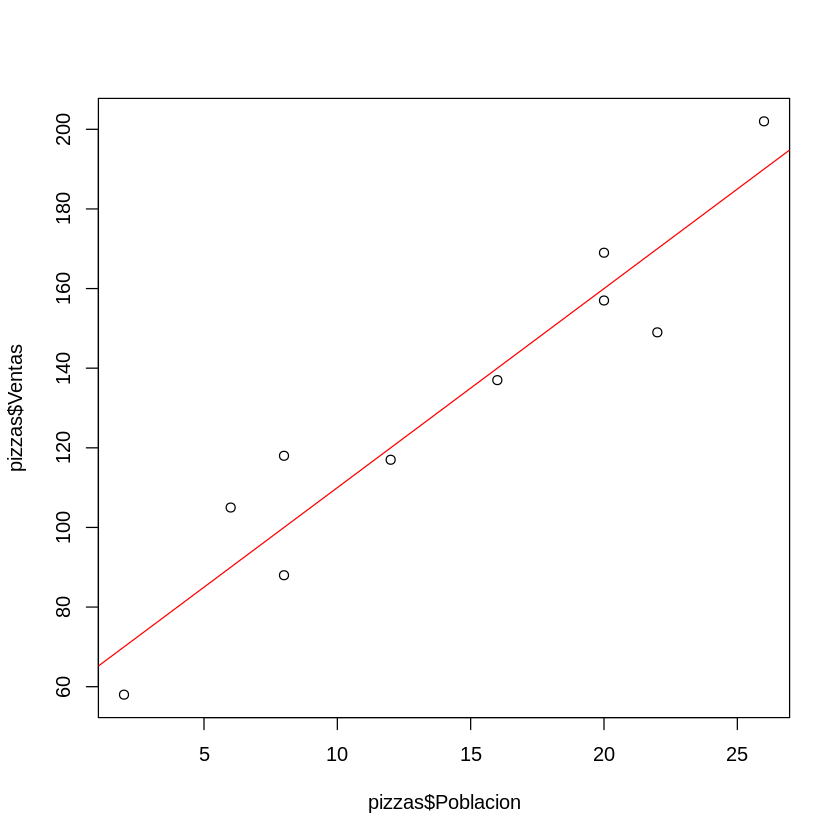

In [ ]:
plot(pizzas$Poblacion,pizzas$Ventas)
abline(a=modelo2$coefficients[1],b=modelo2$coefficients[2],col="red")

In [ ]:
summary(modelo2)

ERROR: Error: object 'modelo2' not found


In [ ]:
confint(modelo2,level=0.95)

,2.5 %,97.5 %
(Intercept),38.724726,81.275274
Poblacion,3.661906,6.338094


El intercepto población se encuentra entre 38.72 y 81.27 (con un nivel de confianza al 95%). Dado que este intervalo no contiene el valor de 0, no es probable que el parámetro poblacional sea 0, por lo que el interpto poblacional se encuentra entre los valores antes mencionados.  \

En cuanto a $\beta_{1}$, su intervalo de confianza al 95% va de 3.66 a 6.33, tampoco contiene el valor de cero. Lo anterior indica que no es probable que el parámetro poblacional sea 0, así que sí hay una relación entre el tamaño de la población y el ingreso de la pizzería. Se espera que por cada unidad de población (mil estudiantes), se incrementen los ingresos en **cinco unidades** (ver valor de $\hat{β_1}$). Por otro lado, si hubiera contenido el intervalo el valor de cero, ahí sí hubiera existido la posibildiad de que el valor del parámetro fuese cero, por lo que era probable que no se determinar el monto de ventas dado el tamaño poblacional de la escuela.

### Ejemplo de Costo-Años de la maquinaria (hacer los intervalos de confianza)

In [ ]:
confint(modelo1,level=0.95)

,2.5 %,97.5 %
(Intercept),86.866182,116.20048
Anios,6.882967,14.92656


Ninguno de los dos intervalos de confianza incluye el valor de **0**. Como el intervalo de la variable $X$ (años), no incluye dicho valor, podemos concluir que la variable *Años* sí ayuda a la explicación del comportamiento de la variable *Costo*. \
* ¿En qué medida contribuye? \
* ¿Cuánta de la variabilidad es explicada por esta variable? \
* ¿Y si agregamos más variables se podría mejorar esa 'explicación' del costo?

In [ ]:
aov(modelo1) #aov = análisis de varianza (descomposición de la variabilidad)
SCT=1248.5952+255.5048
1248.5952/SCT
255.5048/SCT
round(1-(255.5048/SCT),4)*100

Call:
   aov(formula = modelo1)

Terms:
                    Anios Residuals
Sum of Squares  1248.5952  255.5048
Deg. of Freedom         1         8

Residual standard error: 5.65138
Estimated effects may be unbalanced

[1] 0.8301278

[1] 0.1698722

[1] 83.01

In [ ]:
Festimada<-(1248.5952/1)/(255.5048/8)
Festimada

[1] 39.09422

In [ ]:
qf(0.05,1,8,lower.tail = FALSE)

[1] 5.317655

ifelse()

In [ ]:
ifelse(Festimada>=qf(0.05,1,8,lower.tail = FALSE),"Rechazar Ho","No rechazar Ho")

[1] "Rechazar Ho"

In [ ]:
#pizzas #modelo2
aov(modelo2)
#summary(modelo2)

Call:
   aov(formula = modelo2)

Terms:
                Poblacion Residuals
Sum of Squares      14200      1530
Deg. of Freedom         1         8

Residual standard error: 13.82932
Estimated effects may be unbalanced

In [ ]:
anova(modelo2)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Poblacion,1,14200,14200.00,74.24837,2.548866e-05
Residuals,8,1530,191.25,NA,NA


In [ ]:
14200/(14200+1530)

[1] 0.9027336

In [ ]:
15730*.65

[1] 10224.5

In [ ]:
#14200/(1530/8) #F calculado = 5.30 F_calc < F_alfa
#15,730 = 7865(SCR) + 7865(SCE)
#65% es del error, 35% es de la regresión
Fcalculado<-5505.5/(10224.5/8) #(T*x/(T*(1-x)/8))=5.31
Fcalculado

[1] 4.307692

In [ ]:
ifelse(Fcalculado>=qf(0.05,1,8,lower.tail = FALSE),"H1","Ho") # F de alfa

[1] "Ho"

¿A qué punto podemos comenza a no rechazar $H_{0}$? Esto es, ¿en qué punto el $F$ calculado se vuelve menor a $F_{\alpha , 1,n-2}?$ Sabiendo que $SCT = 15,730$ Calcular el coeficiente de determinación $R^2$ cuando esa condición se cumple.

In [ ]:
qf(0.05,1,8,lower.tail = FALSE)

[1] 5.317655

# REGRESIÓN LINEAL MÚLTIPLE

In [ ]:
tamanio<-c(18,20,25,22,33,19,17)
recamaras<-c(3,3,4,4,5,4,3)
precio<-c(80,95,104,110,175,85,89)
casas<-data.frame(Tamanio=tamanio,Recamaras=recamaras,Precio=precio)

In [ ]:
dim(casas)

[1] 7 3

In [ ]:
disenio<-data.frame(Unos=rep(1,7),Recamaras=casas$Recamaras,Tamanio=casas$Tamanio)
disenio #equis
disenio2<-as.matrix(disenio)

Unos,Recamaras,Tamanio
<dbl>,<dbl>,<dbl>
1,3,18
1,3,20
1,4,25
1,4,22
1,5,33
1,4,19
1,3,17


In [ ]:
# Estimación de los betas, y su respectivo intervalo de confianza
betass<-solve(t(disenio2)%*%disenio2)%*%t(disenio)%*%precio
betass

Unos,-16.093385
Recamaras,-1.173152
Tamanio,5.721790


In [ ]:
SSE2<- t(precio)%*%precio-t(betass)%*%(t(disenio2)%*%precio)
SSE2

572.393


In [ ]:
MSEE<-SSE2/(nrow(disenio2)-3)
MSEE

143.0982


In [ ]:
modeloo<-lm(Precio~Recamaras+Tamanio,data=casas)
modeloo


Call:
lm(formula = Precio ~ Recamaras + Tamanio, data = casas)

Coefficients:
(Intercept)    Recamaras      Tamanio  
    -16.093       -1.173        5.722  


In [ ]:
anova_modelo<-anova(modeloo)
sct_modelo<-sum(anova_modelo$`Sum Sq`)
sct_regre<-sct_modelo-SSE2
(sct_regre)/sct_modelo #Coef de determinación

0.9092263


In [ ]:
summary(modeloo)



Call:
lm(formula = Precio ~ Recamaras + Tamanio, data = casas)

Residuals:
      1       2       3       4       5       6       7 
 -3.379   0.177 -18.259   4.907   8.140  -2.928  11.342 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  -16.093     24.647  -0.653   0.5494  
Recamaras     -1.173     13.390  -0.088   0.9344  
Tamanio        5.722      1.828   3.130   0.0352 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.96 on 4 degrees of freedom
Multiple R-squared:  0.9092,	Adjusted R-squared:  0.8638 
F-statistic: 20.03 on 2 and 4 DF,  p-value: 0.00824


In [ ]:
confint(modeloo)

,2.5 %,97.5 %
(Intercept),-84.5242557,52.33749
Recamaras,-38.3495768,36.00327
Tamanio,0.6470321,10.79655


1) $Y = -16.093+ -1.173 X_1 +5.722 X_2$

In [ ]:
modeloo$coefficients[1]+modeloo$coefficients[2]*4+modeloo$coefficients[3]*25

(Intercept) 
   122.2588

In [ ]:
summary(modeloo)


Call:
lm(formula = Precio ~ Recamaras + Tamanio, data = casas)

Residuals:
      1       2       3       4       5       6       7 
 -3.379   0.177 -18.259   4.907   8.140  -2.928  11.342 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  -16.093     24.647  -0.653   0.5494  
Recamaras     -1.173     13.390  -0.088   0.9344  
Tamanio        5.722      1.828   3.130   0.0352 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.96 on 4 degrees of freedom
Multiple R-squared:  0.9092,	Adjusted R-squared:  0.8638 
F-statistic: 20.03 on 2 and 4 DF,  p-value: 0.00824


De las dos variables estudiadas (El tamaño y el número de recámaras), solo el tamaño de la vivienda repercute en el valor de la misma. Por lo que, el tamaño sí tiene un efecto.

## 2) El segundo conjunto de datos contiene observaciones sobre el porcentaje de personas que van en bicicleta al trabajo cada día, el porcentaje de personas que fuman y el porcentaje de personas con enfermedades cardiacas en una muestra imaginaria de 500 ciudades.

 ¿Se relaciona la cantidad de personas con enfermedades caridacas con el de personas que usan bicicle y fuman?

In [ ]:
enfermedades<-read.csv("/heart.data.csv")

In [ ]:
dim(enfermedades)

[1] 498   4

In [ ]:
colnames(enfermedades)
is.data.frame(enfermedades)

[1] "X"             "biking"        "smoking"       "heart.disease"

[1] TRUE

In [ ]:
disx<-cbind(rep(1,nrow(enfermedades)),enfermedades[,-c(1,4)])
colnames(disx)<-c("Unos","Bicicleta","Fumar")
enfe_cora<-as.numeric(enfermedades[,4])
disx<-as.matrix(disx)

In [ ]:
betass2<-solve(t(disx)%*%disx)%*%t(disx)%*%enfe_cora
SSE22<-t(enfe_cora)%*%enfe_cora-t(betass2)%*%(t(disx)%*%enfe_cora)
betass2
SSE22

Unos,14.9846580
Bicicleta,-0.2001331
Fumar,0.1783339


211.7403


In [ ]:
modeloo2<-lm(heart.disease~biking+smoking,data=enfermedades)
summary(modeloo2)


Call:
lm(formula = heart.disease ~ biking + smoking, data = enfermedades)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1789 -0.4463  0.0362  0.4422  1.9331 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 14.984658   0.080137  186.99   <2e-16 ***
biking      -0.200133   0.001366 -146.53   <2e-16 ***
smoking      0.178334   0.003539   50.39   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.654 on 495 degrees of freedom
Multiple R-squared:  0.9796,	Adjusted R-squared:  0.9795 
F-statistic: 1.19e+04 on 2 and 495 DF,  p-value: < 2.2e-16


Y = Porcentaje de personas con enfermedades cardiacas\
X1= Porcentaje de personas que utilizan la bicicleta para llegar al trabajo.\
X2 = Porcentaje de población fumadora

In [ ]:
confint(modeloo2)

,2.5 %,97.5 %
(Intercept),14.8272075,15.1421084
biking,-0.2028166,-0.1974495
smoking,0.1713800,0.1852878


 1) ¿Qué porcentaje de personas con enfermedades cardiacas se espera encontrar en una ciudad con el 50% de la población que utiliza la bicicleta para llegar al trabajo y, el 10% es fumador? \
 2) ¿Y el 20% de bicicleta y 20% fumador?
 # Encargo (5 o 10 minutos)

In [ ]:
predichos<-data.frame(biking = c(50,20), smoking = c(10,20))
predichos

biking,smoking
<dbl>,<dbl>
50,10
20,20


In [ ]:
predichos2<-data.frame(predichos,
Predicho = predict(modeloo2,new=predichos) )
Predicho


ERROR: Error: object 'Predicho' not found


In [ ]:
modelo_pred <- predict(modeloo2, newdata = data.frame(biking = 50, smoking = 10))
modelo_pred

1 
6.761345

In [ ]:
modelo_pred2 <- predict(modeloo2, newdata = data.frame(biking = 20, smoking = 20))
modelo_pred2

1 
14.54868

In [ ]:
predichos2<-data.frame(predichos,
Predicho = predict(modeloo2, predichos, interval="predict")[,1],
Inferior = predict(modeloo2, predichos, interval="predict")[,2],
Superior = predict(modeloo2, predichos, interval="predict")[,3])
predichos2

,biking,smoking,Predicho,Inferior,Superior
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,50,10,6.761345,5.474047,8.048642
2,20,20,14.548675,13.261070,15.836281
